In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
import time

In [2]:
from tqdm.notebook import tqdm

tmp_list = []

for i in tqdm(range(1, 10)):
    url = 'https://kin.naver.com/search/list.naver?query=%EB%BA%B4%EB%BA%B4%EB%A1%9C%EB%8D%B0%EC%9D%B4&page=' + str(i)
    html = urlopen(url)

    soup = BeautifulSoup(html, 'html.parser')
    
    docs = soup.find('ul', {'class':'basic1'}).find_all('li')
    
    for doc in docs:
        ans = doc.find_all('dd')[1]
        tmp_list.append(ans.text.strip())
    time.sleep(0.5)

  0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
ko_doc = '\n'.join(tmp_list)
print(ko_doc[:1000])

... 내일이 빼빼로데이인데 빼빼로를 줘야 되나요? 저는 주고는 싶은데 차였는데... 내일이 빼빼로 데이여서 빼빼로를 줘야 하는지 어떻게 해야하는지 고민이 되는 것 같아요....
내일 빼빼로 데이인가요? 그렇습니다. 빼빼로 데이는 대한민국의 독특한 기념일로 11월 11일에 초콜릿 과자인 빼빼로를 주고받는 기념일입니다.
제가 얼마전에 생긴 짝남에게 빼빼로 데이에 빼빼로를 주고... 짝남 빼빼로데이 관련 답변드려용!! 약간 부담은... 않으면 빼빼로데이니까 절대 부담 안될 거 같은데요!! 음...
마침 100일이 빼빼로 데이인데 여자친구 선물을 빼빼로랑 꽃 선물세트 있는데... 질문) 마침 100일이 빼빼로 데이인데 여자친구 선물을 빼빼로랑 꽃 선물세트 있는데...
이제 얼마안있으면 빼빼로데이잖아욥..! 그래서 제가 저희학년수학 맡아주시는 분이랑 저희반 담임선생님 빼빼로 드리려고하는데 법적으로 무슨 김영란 법인가? 그것때문에...
초콜릿 안먹는 남자친구 빼빼로데이 선물 추천해주세요  안녕하세요^^ 아고 남자친구분꼐서 빼뺴로를 안드시구나 ㅠㅠ 빼빼로 느낌이 들어간 핸드메이드...
빼빼로 데이는 마케팅으로 생겨났나요? 1993년 계성여중이라고 하는 부산의 한 중학교에서 학생들끼리 하던 행사에서 시작하여 롯데제과가 발빠르게 조치한...
빼빼로데이에 빼빼로 40개이상 만들어야되는데 빼빼로 만들기키트 추천해주세욥! 빼빼로 막대과자를 40개정도 만들수 있는 키트가 있어서 정보 공유합니다~ 수제 초코...
막 빼빼로 데이 11월 11일 이렇게 써서 알려주세요!ㅠㅠㅠㅠ 기념일 챙기고... 11월 11일 빼빼로데이 11월 12일 새우깡데이 11월 13일 에그데이 12월 12일 허니데이
곧있으면 다가오는 빼빼로 데이를 맞아 빼빼로를 사려고 했는데 올해는 뭔가 직접... 이번 빼빼로데이때 직접 만들어서 친구들에게 선물해주고 싶었는데 어머니께서 이해해주지...
빼빼로데이선물 추천 부탁드려요 여자친구 랑 첫 기념일인데 특별한 빼빼로데이 선물 뭐가있을까요... 꽃이나 귀엽고 사랑스런 기억

In [5]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ko_doc_noun = okt.nouns(ko_doc)

count_noun = Counter(ko_doc_noun)

wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)
count_noun.most_common(20)

[('빼빼로데이', 120),
 ('빼빼로', 97),
 ('선물', 74),
 ('데이', 36),
 ('여자친구', 27),
 ('추천', 26),
 ('친구', 23),
 ('때', 18),
 ('제', 16),
 ('저', 15),
 ('거', 11),
 ('남자친구', 11),
 ('이번', 11),
 ('내일', 10),
 ('직접', 10),
 ('요', 10),
 ('날', 10),
 ('좀', 10),
 ('남자', 9),
 ('준비', 8)]

In [6]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for noun_word in count_noun:
    if len(noun_word) == 1:
        stopword_list.append(noun_word)

for stopword in stopword_list:
    count_noun.pop(stopword)

count_noun.most_common(20)

[('선물', 74),
 ('여자친구', 27),
 ('추천', 26),
 ('친구', 23),
 ('남자친구', 11),
 ('이번', 11),
 ('내일', 10),
 ('직접', 10),
 ('남자', 9),
 ('준비', 8),
 ('그냥', 7),
 ('시간', 7),
 ('여자', 7),
 ('기념일', 6),
 ('이벤트', 6),
 ('고민', 5),
 ('초콜릿', 5),
 ('짝남', 5),
 ('질문', 5),
 ('생각', 5)]

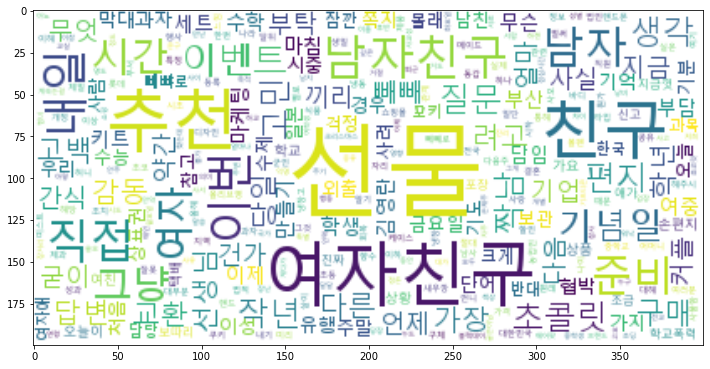

In [7]:
wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

plt.figure(figsize=(12,8))
plt.imshow(wc_noun, interpolation='bilinear')
plt.show()

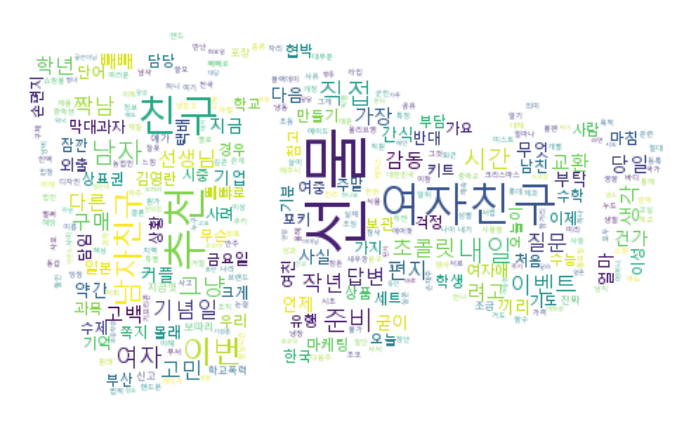

In [9]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('present.jpg'))
wc_img = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf', mask=img_mask)
wc_img = wc_img.generate_from_frequencies(count_noun)

plt.figure(figsize=(12,8))
plt.imshow(wc_img, interpolation='bilinear')
plt.axis('off')
plt.show()

## 선물 모양의 mask에 워드 클라우드를 넣었다.